# DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from imblearn.over_sampling import SMOTE

In [2]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.copy()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
df=pd.get_dummies(df,["gender","ever_married","work_type","Residence_type","smoking_status"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4909 non-null   int64  
 1   age                             4909 non-null   float64
 2   hypertension                    4909 non-null   int64  
 3   heart_disease                   4909 non-null   int64  
 4   avg_glucose_level               4909 non-null   float64
 5   bmi                             4909 non-null   float64
 6   stroke                          4909 non-null   int64  
 7   gender_Female                   4909 non-null   uint8  
 8   gender_Male                     4909 non-null   uint8  
 9   gender_Other                    4909 non-null   uint8  
 10  ever_married_No                 4909 non-null   uint8  
 11  ever_married_Yes                4909 non-null   uint8  
 12  work_type_Govt_job              49

In [10]:
df.drop("id",axis=1, inplace=True)

In [11]:
df["stroke"].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [12]:
df2=df[df["stroke"]==1]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 248
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             209 non-null    float64
 1   hypertension                    209 non-null    int64  
 2   heart_disease                   209 non-null    int64  
 3   avg_glucose_level               209 non-null    float64
 4   bmi                             209 non-null    float64
 5   stroke                          209 non-null    int64  
 6   gender_Female                   209 non-null    uint8  
 7   gender_Male                     209 non-null    uint8  
 8   gender_Other                    209 non-null    uint8  
 9   ever_married_No                 209 non-null    uint8  
 10  ever_married_Yes                209 non-null    uint8  
 11  work_type_Govt_job              209 non-null    uint8  
 12  work_type_Never_worked          209 

# DATA VISUALIZATION

Text(0, 0.5, 'Correlation percentage')

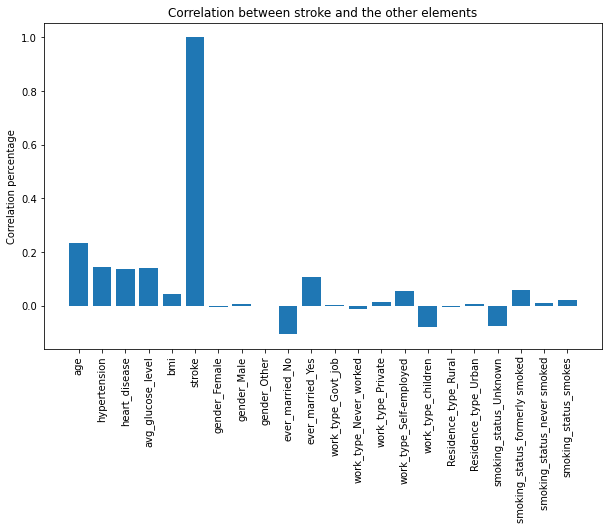

In [13]:
# show up the correlation between the people who have a stroke and other features
fig,ax=plt.subplots(figsize=(10,6))
x=df.corr()["stroke"].index
y=df.corr()["stroke"].values

plt.bar(list(x),list(y))
plt.tick_params(axis="x",labelrotation = 90)
plt.title("Correlation between stroke and the other elements")
plt.ylabel("Correlation percentage")

<AxesSubplot: >

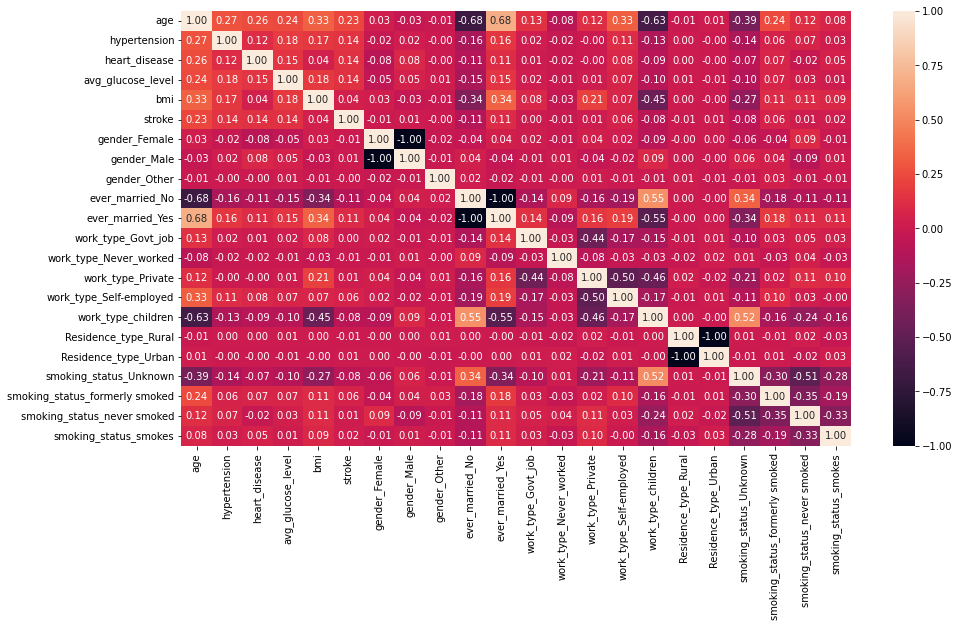

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

Text(0, 0.5, 'Count')

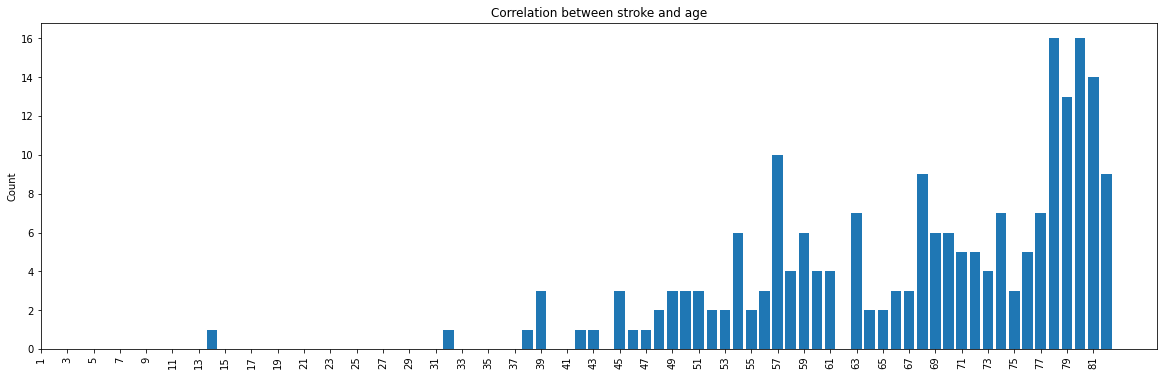

In [15]:
fig,ax=plt.subplots(figsize=(20,6))
x=df2["age"].value_counts().index
y=df2["age"].value_counts().values

plt.bar(list(x),list(y))
plt.tick_params(axis="x",labelrotation = 90)
plt.xticks(np.arange(1, max(x)+1,2))
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title("Correlation between stroke and age")
plt.ylabel("Count")

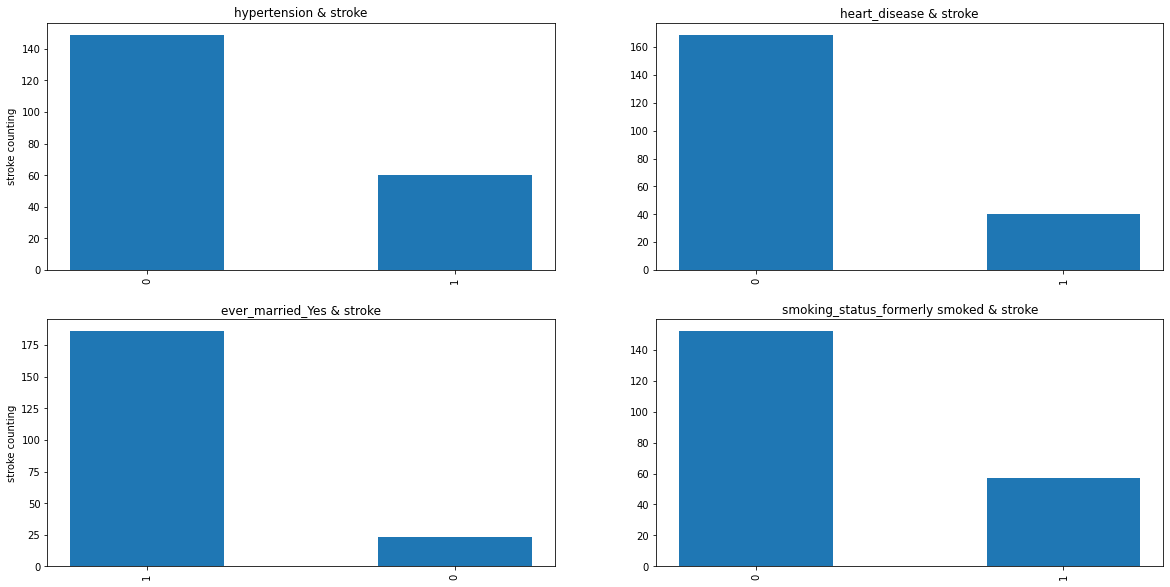

In [16]:
# the releation between stroke and other featsures
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
x=np.array(df2["hypertension"].value_counts().index.astype(str))
y=np.array(df2["hypertension"].value_counts().values)
ax[0,0].bar(x,y,width=.5)
ax[0,0].tick_params(axis='x', labelrotation = 90)
ax[0,0].set_title("hypertension & stroke")
ax[0,0].set_ylabel("stroke counting")
fig.set_figheight(10)

x1=np.array(df2["heart_disease"].value_counts().index.astype(str))
y1=np.array(df2["heart_disease"].value_counts().values)
ax[0,1].bar(x1,y1,width=.5)
ax[0,1].tick_params(axis='x', labelrotation = 90)
ax[0,1].set_title("heart_disease & stroke")
fig.set_figheight(10)

x2=np.array(df2["ever_married_Yes"].value_counts().index.astype(str))
y2=np.array(df2["ever_married_Yes"].value_counts().values)
ax[1,0].bar(x2,y2,width=.5)
ax[1,0].tick_params(axis='x', labelrotation = 90)
ax[1,0].set_title("ever_married_Yes & stroke")
ax[1,0].set_ylabel("stroke counting")
fig.set_figheight(10)

x3=np.array(df2["smoking_status_formerly smoked"].value_counts().index.astype(str))
y3=np.array(df2["smoking_status_formerly smoked"].value_counts().values)
ax[1,1].bar(x3,y3,width=.5)
ax[1,1].tick_params(axis='x', labelrotation = 90)
ax[1,1].set_title("smoking_status_formerly smoked & stroke")
fig.set_figheight(10)


# TRAINING MODELS

## Without OverSampling

In [17]:
# get the X,y axis
X=df.drop("stroke",axis=1).values
y=df["stroke"].values

In [18]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### KNeighborsClassifier

In [19]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
M_2_pre_train=model2.predict(x_train)
M_2_pre_test=model2.predict(x_test)

In [20]:
print("Train : ")
print(classification_report(M_2_pre_train,y_train),"\n confusion_matrix : \n",confusion_matrix(M_2_pre_train,y_train))
print("*"*50)
print("test: \n",classification_report(M_2_pre_test,y_test),"\n confusion_matrix : \n",confusion_matrix(M_2_pre_test,y_test))

Train : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3411
           1       0.08      0.48      0.14        25

    accuracy                           0.96      3436
   macro avg       0.54      0.72      0.56      3436
weighted avg       0.99      0.96      0.97      3436
 
 confusion_matrix : 
 [[3278  133]
 [  13   12]]
**************************************************
test: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1461
           1       0.02      0.08      0.03        12

    accuracy                           0.95      1473
   macro avg       0.50      0.52      0.50      1473
weighted avg       0.98      0.95      0.97      1473
 
 confusion_matrix : 
 [[1398   63]
 [  11    1]]


### DecisionTreeClassifier

In [21]:
model3=DecisionTreeClassifier(max_depth=15)
model3.fit(x_train,y_train)
M_3_pre_train=model3.predict(x_train)
M_3_pre_test=model3.predict(x_test)

In [22]:
print("Train: \n",classification_report(M_3_pre_train,y_train),"\n confusion_matrix : \n",confusion_matrix(M_3_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_3_pre_test,y_test),"\n confusion_matrix : \n",confusion_matrix(M_3_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3296
           1       0.97      1.00      0.98       140

    accuracy                           1.00      3436
   macro avg       0.98      1.00      0.99      3436
weighted avg       1.00      1.00      1.00      3436
 
 confusion_matrix : 
 [[3291    5]
 [   0  140]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1392
           1       0.14      0.11      0.12        81

    accuracy                           0.91      1473
   macro avg       0.54      0.54      0.54      1473
weighted avg       0.90      0.91      0.91      1473
 
 confusion_matrix : 
 [[1337   55]
 [  72    9]]


### Logistic Regression

In [23]:
model4 = LogisticRegression(solver="newton-cg", max_iter=1000, fit_intercept=True, penalty="l2", C=0.1)
model4.fit(x_train,y_train)
M_4_pre_train = model4.predict(x_train)
M_4_pre_test = model4.predict(x_test)

In [24]:
print("Train: \n",classification_report(M_4_pre_train,y_train),"\n confusion_matrix : \n",confusion_matrix(M_4_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_4_pre_test,y_test),"\n confusion_matrix : \n",confusion_matrix(M_4_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      3435
           1       0.01      1.00      0.01         1

    accuracy                           0.96      3436
   macro avg       0.50      0.98      0.50      3436
weighted avg       1.00      0.96      0.98      3436
 
 confusion_matrix : 
 [[3291  144]
 [   0    1]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1473
           1       0.00      0.00      0.00         0

    accuracy                           0.96      1473
   macro avg       0.50      0.48      0.49      1473
weighted avg       1.00      0.96      0.98      1473
 
 confusion_matrix : 
 [[1409   64]
 [   0    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForest

In [25]:
para={"n_estimators":range(100,111)}
mod=RandomForestClassifier()
model5=GridSearchCV(mod,para)
model5.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(100, 111)})

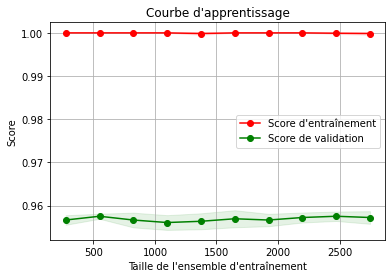

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve

para = {"n_estimators":range(100,111)}

mod = RandomForestClassifier()

model5 = GridSearchCV(mod, para)

model5.fit(x_train, y_train)

train_sizes, train_scores, test_scores = learning_curve(
    model5.best_estimator_, X=x_train, y=y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.grid()

plt.fill_between(
    train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r"
)
plt.fill_between(
    train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g"
)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

plt.legend(loc="best")
plt.show()


In [27]:
pd.DataFrame(model5.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.202668,0.013630,0.013706,0.000647,100,{'n_estimators': 100},0.956395,0.956332,0.957787,0.956332,0.957787,0.956927,0.000703,8
1,0.199250,0.002000,0.013888,0.000397,101,{'n_estimators': 101},0.956395,0.956332,0.959243,0.956332,0.957787,0.957218,0.001155,5
2,0.193630,0.001378,0.013376,0.000037,102,{'n_estimators': 102},0.959302,0.956332,0.957787,0.957787,0.956332,0.957508,0.001108,3
3,0.201298,0.004343,0.013625,0.000260,103,{'n_estimators': 103},0.956395,0.956332,0.956332,0.956332,0.956332,0.956345,0.000025,11
4,0.199165,0.002085,0.013595,0.000133,104,{'n_estimators': 104},0.954942,0.956332,0.957787,0.957787,0.957787,0.956927,0.001142,6
5,0.199424,0.002012,0.014141,0.000712,105,{'n_estimators': 105},0.954942,0.956332,0.959243,0.957787,0.954876,0.956636,0.001684,10
6,0.201277,0.002094,0.013879,0.000160,106,{'n_estimators': 106},0.959302,0.956332,0.957787,0.957787,0.956332,0.957508,0.001108,3
7,0.203896,0.000948,0.014071,0.000079,107,{'n_estimators': 107},0.954942,0.954876,0.959243,0.957787,0.957787,0.956927,0.001732,6
8,0.205986,0.002016,0.014226,0.000109,108,{'n_estimators': 108},0.956395,0.956332,0.959243,0.957787,0.957787,0.957509,0.001076,2
9,0.215808,0.006640,0.014852,0.000398,109,{'n_estimators': 109},0.957849,0.956332,0.957787,0.957787,0.954876,0.956926,0.001174,9


In [28]:
Model5_best=model5.best_estimator_
M_5_pre_train=Model5_best.predict(x_train)
M_5_pre_test=Model5_best.predict(x_test)

In [29]:
print("Train: \n",classification_report(M_5_pre_train,y_train),"\nconfusion_matrix: \n",confusion_matrix(M_5_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_5_pre_test,y_test),"\nconfusion_matrix: \n",confusion_matrix(M_5_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3291
           1       1.00      1.00      1.00       145

    accuracy                           1.00      3436
   macro avg       1.00      1.00      1.00      3436
weighted avg       1.00      1.00      1.00      3436
 
confusion_matrix: 
 [[3291    0]
 [   0  145]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1472
           1       0.00      0.00      0.00         1

    accuracy                           0.96      1473
   macro avg       0.50      0.48      0.49      1473
weighted avg       1.00      0.96      0.98      1473
 
confusion_matrix: 
 [[1408   64]
 [   1    0]]


### Result of Non-OverSampling

In [31]:
def scores():
    RF=print("Random Forest recall score :",accuracy_score(M_5_pre_test,y_test))
    KNN=print("KNeighborsClassifier recall score :",accuracy_score(M_2_pre_test,y_test))
    DT=print("DecisionTreeClassifier recall score :",accuracy_score(M_3_pre_test,y_test))
    LR=print("LogisticRegression recall score :", accuracy_score(M_4_pre_test,y_test))
    
    return KNN,DT,RF,LR
scores();

Random Forest recall score : 0.9558723693143245
KNeighborsClassifier recall score : 0.9497623896809233
DecisionTreeClassifier recall score : 0.9137813985064495
LogisticRegression recall score : 0.956551255940258


## With OverSampling using SMOTE

In [32]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = pd.get_dummies(df,["gender","ever_married","work_type","Residence_type","smoking_status"])
df.drop(["ever_married_No", "work_type_children", "smoking_status_Unknown","id"], axis=1, inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=["stroke"])
y = df["stroke"]

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

df_resampled = pd.concat([X_res, y_res], axis=1)

In [33]:
# get the X,y axis
X=df_resampled.drop("stroke",axis=1).values
y=df_resampled["stroke"].values

In [34]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### KNeighborsClassifier

In [36]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
M_2_pre_train=model2.predict(x_train)
M_2_pre_test=model2.predict(x_test)

In [37]:
print("Train : ")
print(classification_report(M_2_pre_train,y_train),"\n confusion_matrix : \n",confusion_matrix(M_2_pre_train,y_train))
print("*"*50)
print("test: \n",classification_report(M_2_pre_test,y_test),"\n confusion_matrix : \n",confusion_matrix(M_2_pre_test,y_test))

Train : 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2825
           1       0.99      0.87      0.92      3755

    accuracy                           0.92      6580
   macro avg       0.92      0.93      0.92      6580
weighted avg       0.93      0.92      0.92      6580
 
 confusion_matrix : 
 [[2790   35]
 [ 494 3261]]
**************************************************
test: 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      1142
           1       0.98      0.82      0.89      1678

    accuracy                           0.88      2820
   macro avg       0.88      0.90      0.88      2820
weighted avg       0.90      0.88      0.88      2820
 
 confusion_matrix : 
 [[1114   28]
 [ 302 1376]]


### DecisionTreeClassifier 

In [38]:
model3=DecisionTreeClassifier(max_depth=15)
model3.fit(x_train,y_train)
M_3_pre_train=model3.predict(x_train)
M_3_pre_test=model3.predict(x_test)

In [39]:
print("Train: \n",classification_report(M_3_pre_train,y_train),"\n confusion_matrix : \n",confusion_matrix(M_3_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_3_pre_test,y_test),"\n confusion_matrix : \n",confusion_matrix(M_3_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3263
           1       1.00      0.99      1.00      3317

    accuracy                           1.00      6580
   macro avg       1.00      1.00      1.00      6580
weighted avg       1.00      1.00      1.00      6580
 
 confusion_matrix : 
 [[3258    5]
 [  26 3291]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1384
           1       0.95      0.92      0.94      1436

    accuracy                           0.93      2820
   macro avg       0.93      0.93      0.93      2820
weighted avg       0.94      0.93      0.93      2820
 
 confusion_matrix : 
 [[1308   76]
 [ 108 1328]]


### LogisticRegression

In [40]:
model4 = LogisticRegression(solver="newton-cg", max_iter=1000, fit_intercept=True, penalty="l2", C=0.1)
model4.fit(x_train,y_train)
M_4_pre_train = model4.predict(x_train)
M_4_pre_test = model4.predict(x_test)

In [41]:
print("Train: \n",classification_report(M_4_pre_train,y_train),"\n confusion_matrix : \n",confusion_matrix(M_4_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_4_pre_test,y_test),"\n confusion_matrix : \n",confusion_matrix(M_4_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      3397
           1       0.91      0.94      0.92      3183

    accuracy                           0.93      6580
   macro avg       0.93      0.93      0.93      6580
weighted avg       0.93      0.93      0.93      6580
 
 confusion_matrix : 
 [[3097  300]
 [ 187 2996]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1436
           1       0.92      0.93      0.93      1384

    accuracy                           0.93      2820
   macro avg       0.93      0.93      0.93      2820
weighted avg       0.93      0.93      0.93      2820
 
 confusion_matrix : 
 [[1322  114]
 [  94 1290]]


### Basic GridSearch RandomForest

In [39]:
para={"n_estimators":range(100,111)}
mod=RandomForestClassifier()
model55=GridSearchCV(mod,para)
model55.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(100, 111)})

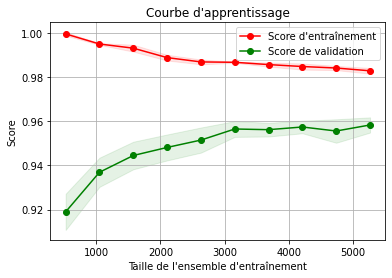

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve

para = {"n_estimators":range(100,111)}

mod = RandomForestClassifier(max_depth=10)

model55 = GridSearchCV(mod, para)

model55.fit(x_train, y_train)

train_sizes, train_scores, test_scores = learning_curve(
    model55.best_estimator_, X=x_train, y=y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.grid()

plt.fill_between(
    train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r"
)
plt.fill_between(
    train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g"
)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

plt.legend(loc="best")
plt.show()


In [44]:
pd.DataFrame(model55.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.369656,0.013422,0.021962,0.000607,100,{'n_estimators': 100},0.971125,0.970365,0.967325,0.967325,0.967325,0.968693,0.001692,10
1,0.365069,0.009107,0.022105,0.000663,101,{'n_estimators': 101},0.972644,0.971125,0.968085,0.968845,0.965805,0.969301,0.002384,6
2,0.360504,0.003864,0.021872,0.000125,102,{'n_estimators': 102},0.972644,0.971125,0.968085,0.970365,0.963526,0.969149,0.003173,7
3,0.364512,0.003458,0.022044,0.000108,103,{'n_estimators': 103},0.972644,0.969605,0.965805,0.970365,0.963526,0.968389,0.003281,11
4,0.368371,0.003812,0.022219,0.000131,104,{'n_estimators': 104},0.972644,0.971884,0.966565,0.971125,0.967325,0.969909,0.002479,3
5,0.368856,0.003227,0.022443,0.000159,105,{'n_estimators': 105},0.974164,0.968085,0.968845,0.970365,0.969605,0.970213,0.002117,1
6,0.378500,0.004609,0.022916,0.000553,106,{'n_estimators': 106},0.972644,0.971884,0.966565,0.968085,0.968085,0.969453,0.002374,5
7,0.379444,0.001603,0.023071,0.000577,107,{'n_estimators': 107},0.973404,0.969605,0.968845,0.968845,0.964286,0.968997,0.002900,8
8,0.380124,0.002331,0.022937,0.000082,108,{'n_estimators': 108},0.971884,0.971884,0.968085,0.969605,0.963526,0.968997,0.003092,8
9,0.384661,0.003075,0.023250,0.000065,109,{'n_estimators': 109},0.971125,0.970365,0.969605,0.968845,0.968085,0.969605,0.001075,4


In [44]:
Model55_best=model55.best_estimator_
M_55_pre_train=Model55_best.predict(x_train)
M_55_pre_test=Model55_best.predict(x_test)

In [45]:
print("Train: \n",classification_report(M_55_pre_train,y_train),"\nconfusion_matrix: \n",confusion_matrix(M_55_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_55_pre_test,y_test),"\nconfusion_matrix: \n",confusion_matrix(M_55_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3286
           1       0.98      0.98      0.98      3294

    accuracy                           0.98      6580
   macro avg       0.98      0.98      0.98      6580
weighted avg       0.98      0.98      0.98      6580
 
confusion_matrix: 
 [[3226   60]
 [  58 3236]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1429
           1       0.96      0.97      0.96      1391

    accuracy                           0.96      2820
   macro avg       0.96      0.96      0.96      2820
weighted avg       0.96      0.96      0.96      2820
 
confusion_matrix: 
 [[1369   60]
 [  47 1344]]


### Better GridSearch RandomForest

In [47]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits


Traceback (most recent call last):
  File "/home/dorian/.local/lib/python3.8/site-packages/gradio/routes.py", line 344, in run_predict
    output = await app.get_blocks().process_api(
  File "/home/dorian/.local/lib/python3.8/site-packages/gradio/blocks.py", line 1012, in process_api
    result = await self.call_function(
  File "/home/dorian/.local/lib/python3.8/site-packages/gradio/blocks.py", line 830, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/home/dorian/.local/lib/python3.8/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/home/dorian/.local/lib/python3.8/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/home/dorian/.local/lib/python3.8/site-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "/tmp/ipykernel_8004/856381866.py", line 13, in infer
    predictions =

Best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.970


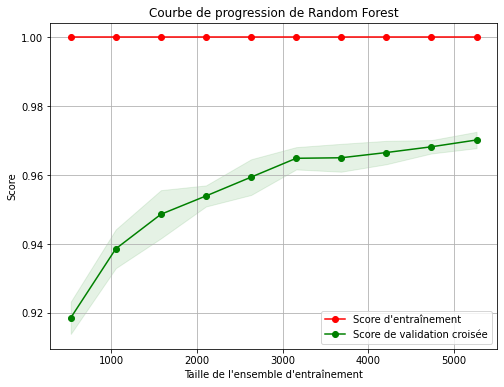

In [46]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model5, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Courbe de progression de Random Forest")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation croisée")

plt.legend(loc="best")
plt.show()

In [36]:
model5 = RandomForestClassifier(n_estimators=100,
                               max_depth=10,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features="sqrt",
                               random_state=42)
model5.fit(x_train,y_train)
M_5_pre_train = model5.predict(x_train)
M_5_pre_test = model5.predict(x_test)

print("Train: \n",classification_report(M_5_pre_train,y_train),"\nconfusion_matrix: \n",confusion_matrix(M_5_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_5_pre_test,y_test),"\nconfusion_matrix: \n",confusion_matrix(M_5_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3282
           1       0.98      0.98      0.98      3298

    accuracy                           0.98      6580
   macro avg       0.98      0.98      0.98      6580
weighted avg       0.98      0.98      0.98      6580
 
confusion_matrix: 
 [[3218   64]
 [  66 3232]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1427
           1       0.96      0.97      0.96      1393

    accuracy                           0.96      2820
   macro avg       0.96      0.96      0.96      2820
weighted avg       0.96      0.96      0.96      2820
 
confusion_matrix: 
 [[1370   57]
 [  46 1347]]


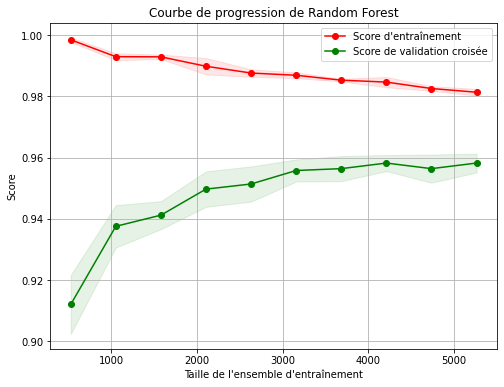

In [37]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model5, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Courbe de progression de Random Forest")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation croisée")

plt.legend(loc="best")
plt.show()

In [47]:
print("Better GridSearch Random Forest recall score :",recall_score(M_5_pre_test,y_test))
print("Basic GridSearch Random Forest recall score :",recall_score(M_55_pre_test,y_test))

Better GridSearch Random Forest recall score : 0.9669777458722182
Basic GridSearch Random Forest recall score : 0.9662113587347232


In [50]:
with open('model5.pkl', 'wb') as file:
    pickle.dump(model5, file)

# Results of OverSampling with Smote

In [51]:
def scores():
    RF=print("Better GridSearch Random Forest recall score :",recall_score(M_5_pre_test,y_test))
    RF2=print("Basic GridSearch Random Forest recall score :",accuracy_score(M_55_pre_test,y_test))
    KNN=print("KNeighborsClassifier recall score :",recall_score(M_2_pre_test,y_test))
    DT=print("DecisionTreeClassifier recall score :",recall_score(M_3_pre_test,y_test))
    LR=print("LogisticRegression recall score :", recall_score(M_4_pre_test,y_test))
    
    return KNN,DT,RF,LR
scores();

Better GridSearch Random Forest recall score : 0.9755219582433405
Basic GridSearch Random Forest recall score : 0.9716312056737588
KNeighborsClassifier recall score : 0.8200238379022646
DecisionTreeClassifier recall score : 0.924791086350975
LogisticRegression recall score : 0.9320809248554913


# INTERFACE WITH GRADIO

In [52]:
inputs = [gr.Dataframe(row_count=(1, "dynamic"), col_count=(4, "dynamic"), label="Données d'entrée", interactive=True)]

outputs = [gr.Dataframe(row_count=(1, "dynamic"), col_count=(1, "fixed"), label="Prédictions", headers=["Failures"])]

with open("model5.pkl", "rb") as rf:
    model = pickle.load(rf)

def infer(input_dataframe):
    if "stroke" in input_dataframe.columns:
        input_dataframe.drop(columns=["stroke"], inplace=True)
        input_dataframe.fillna(input_dataframe.mean(), inplace=True)

    predictions = pd.DataFrame(model.predict(input_dataframe), columns=["Failures"])
    predictions["Failures"] = predictions["Failures"].apply(lambda x: "Risque d'AVC" if x == 1 else "Faible risque d'AVC")

    return predictions

random_row = df.sample(n=2, random_state=np.random.randint(100))
iface = gr.Interface(
    fn=infer, 
    inputs=inputs, 
    outputs=outputs, 
    examples=[[random_row]], 
    allow_flagging="never",
    title="Prédictions d'AVC",
    description="Un modèle de prédiction utilisant la méthode du Random Forest",
    article="Utilisez ces exemples pour pré-remplir les valeurs du tableau.")
    #live=True

iface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [48]:
# Tester le gridsearch sur les anciens modèles pour voir si aucun modèle ne fait mieux que 0.97
# Améliorer l'interface pour qu'elle soit plus facilement utilisable
# Rendre les input entrable de manière propre (checkbox, menu déroulant)
# Réussir à associer les colonnes des inputs de l'interface, aux colonnes du dataset (par exemple quand je rentre
# âge, ça prendra également en compte la colonne âge du dataset.)
# Les âges sont parfois des floats ?? faire un meilleur traitement des données
# Essayer d'utiliser onehotencoder avec column transformer, et faire du standardscaler dessus
# expliquer le smote, les hyperparametres et pourquoi, l'impact de chaque hyperparametres sur le modele,

In [53]:
inputs = [gr.Dataframe(row_count=(1, "dynamic"), col_count=(4, "dynamic"), label="Données d'entrée", interactive=True)]

outputs = [gr.Dataframe(row_count=(1, "dynamic"), col_count=(3, "fixed"), label="Prédictions", headers=["Failures", "Probabilité de risque d'AVC", "Probabilité de faible risque d'AVC"])]

with open("model5.pkl", "rb") as rf:
    model = pickle.load(rf)

def infer(input_dataframe):
    if "stroke" in input_dataframe.columns:
        input_dataframe.drop(columns=["stroke"], inplace=True)
        input_dataframe.fillna(input_dataframe.mean(), inplace=True)

    predictions = pd.DataFrame(model.predict(input_dataframe), columns=["Failures"])
    probabilities = pd.DataFrame(model.predict_proba(input_dataframe), columns=["Probabilité de non-AVC", "Probabilité de risque d'AVC"])
    predictions = pd.concat([predictions, probabilities], axis=1)
    predictions["Failures"] = predictions["Failures"].apply(lambda x: "Risque d'AVC" if x == 1 else "Faible risque d'AVC")

    return predictions

random_row = df.sample(n=2, random_state=np.random.randint(100))
iface = gr.Interface(
    fn=infer, 
    inputs=inputs, 
    outputs=outputs, 
    examples=[[random_row]], 
    allow_flagging="never",
    title="Prédictions d'AVC",
    description="Un modèle de prédiction utilisant la méthode du Random Forest",
    article="Utilisez ces exemples aléatoires pour pré-remplir les valeurs du tableau.")
    #live=True

iface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
